# Monte Carlo Tree Search w grze HearthStone

In [5]:
import pandas as pd
aggressive = pd.read_csv("Dane/aggresive.csv", sep=';')
passive = pd.read_csv("Dane/passive.csv", sep=';')
random = pd.read_csv("Dane/random.csv", sep=';')

In [6]:
aggressive.describe()

,single_move_time,round_time,mcts_win,maximal_number_of_playouts,max_tree_depth
count,180.000000,180.000000,180.000000,180.000000,180.0
mean,3.777778,20.222222,0.522222,70542.650000,2.0
std,2.353069,16.112577,0.500899,57858.276971,0.0
min,1.000000,2.000000,0.000000,6493.000000,2.0
25%,2.000000,10.000000,0.000000,21053.000000,2.0
50%,4.000000,20.000000,1.000000,51204.000000,2.0
75%,6.000000,20.000000,1.000000,104247.250000,2.0
max,8.000000,60.000000,1.000000,274917.000000,2.0


In [7]:
passive.describe()

,single_move_time,round_time,mcts_win,maximal_number_of_playouts,max_tree_depth
count,240.000000,240.000000,240.000000,240.000000,240.0
mean,5.166667,13.500000,0.112500,89766.195833,2.0
std,3.190817,5.907233,0.316641,63264.577399,0.0
min,1.000000,2.000000,0.000000,7790.000000,2.0
25%,2.000000,10.000000,0.000000,31078.250000,2.0
50%,5.000000,10.000000,0.000000,81588.500000,2.0
75%,8.000000,20.000000,0.000000,131977.000000,2.0
max,10.000000,20.000000,1.000000,300452.000000,2.0


In [8]:
random.describe()

,single_move_time,round_time,mcts_win,maximal_number_of_playouts,max_tree_depth
count,75.000000,75.000000,75.000000,75.000000,75.0
mean,4.333333,14.533333,0.813333,98210.333333,2.0
std,3.322053,10.226269,0.392268,75591.790304,0.0
min,1.000000,2.000000,0.000000,9213.000000,2.0
25%,1.000000,2.000000,1.000000,31310.000000,2.0
50%,4.000000,10.000000,1.000000,84240.000000,2.0
75%,8.000000,20.000000,1.000000,140005.500000,2.0
max,10.000000,30.000000,1.000000,314752.000000,2.0


In [9]:
aggressive.corr()

,single_move_time,round_time,mcts_win,maximal_number_of_playouts,max_tree_depth
single_move_time,1.000000,0.838252,-0.033705,0.719391,NaN
round_time,0.838252,1.000000,-0.029688,0.572872,NaN
mcts_win,-0.033705,-0.029688,1.000000,0.480801,NaN
maximal_number_of_playouts,0.719391,0.572872,0.480801,1.000000,NaN
max_tree_depth,NaN,NaN,NaN,NaN,NaN


In [10]:
aggressive.cov()

,single_move_time,round_time,mcts_win,maximal_number_of_playouts,max_tree_depth
single_move_time,5.536934,31.781502,-0.039727,9.794120e+04,0.0
round_time,31.781502,259.615146,-0.239603,5.340578e+05,0.0
mcts_win,-0.039727,-0.239603,0.250900,1.393418e+04,0.0
maximal_number_of_playouts,97941.201117,534057.787709,13934.183799,3.347580e+09,0.0
max_tree_depth,0.000000,0.000000,0.000000,0.000000e+00,0.0


In [11]:
passive.corr()

,single_move_time,round_time,mcts_win,maximal_number_of_playouts,max_tree_depth
single_move_time,1.000000,0.332972,0.097320,0.867444,NaN
round_time,0.332972,1.000000,0.079411,0.256024,NaN
mcts_win,0.097320,0.079411,1.000000,0.395354,NaN
maximal_number_of_playouts,0.867444,0.256024,0.395354,1.000000,NaN
max_tree_depth,NaN,NaN,NaN,NaN,NaN


In [12]:
passive.cov()

,single_move_time,round_time,mcts_win,maximal_number_of_playouts,max_tree_depth
single_move_time,10.181311,6.276151,0.098326,1.751071e+05,0.0
round_time,6.276151,34.895397,0.148536,9.568109e+04,0.0
mcts_win,0.098326,0.148536,0.100262,7.919802e+03,0.0
maximal_number_of_playouts,175107.088563,95681.094142,7919.802144,4.002407e+09,0.0
max_tree_depth,0.000000,0.000000,0.000000,0.000000e+00,0.0


In [13]:
random.corr()

,single_move_time,round_time,mcts_win,maximal_number_of_playouts,max_tree_depth
single_move_time,1.000000,0.782303,0.079503,0.865651,NaN
round_time,0.782303,1.000000,0.139691,0.702302,NaN
mcts_win,0.079503,0.139691,1.000000,0.326497,NaN
maximal_number_of_playouts,0.865651,0.702302,0.326497,1.000000,NaN
max_tree_depth,NaN,NaN,NaN,NaN,NaN


In [14]:
random.cov()

,single_move_time,round_time,mcts_win,maximal_number_of_playouts,max_tree_depth
single_move_time,11.036036,26.576577,0.103604,2.173822e+05,0.0
round_time,26.576577,104.576577,0.560360,5.428946e+05,0.0
mcts_win,0.103604,0.560360,0.153874,9.681347e+03,0.0
maximal_number_of_playouts,217382.225225,542894.576577,9681.346847,5.714119e+09,0.0
max_tree_depth,0.000000,0.000000,0.000000,0.000000e+00,0.0


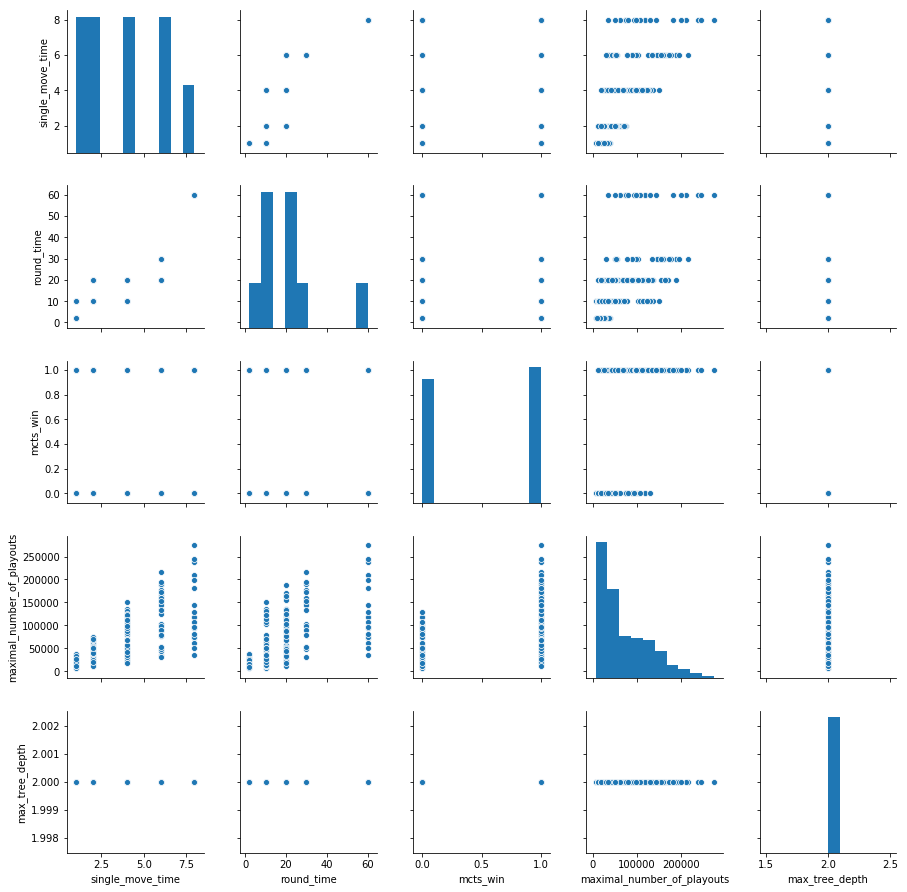

In [19]:
import seaborn as sns
sns.pairplot(aggressive)

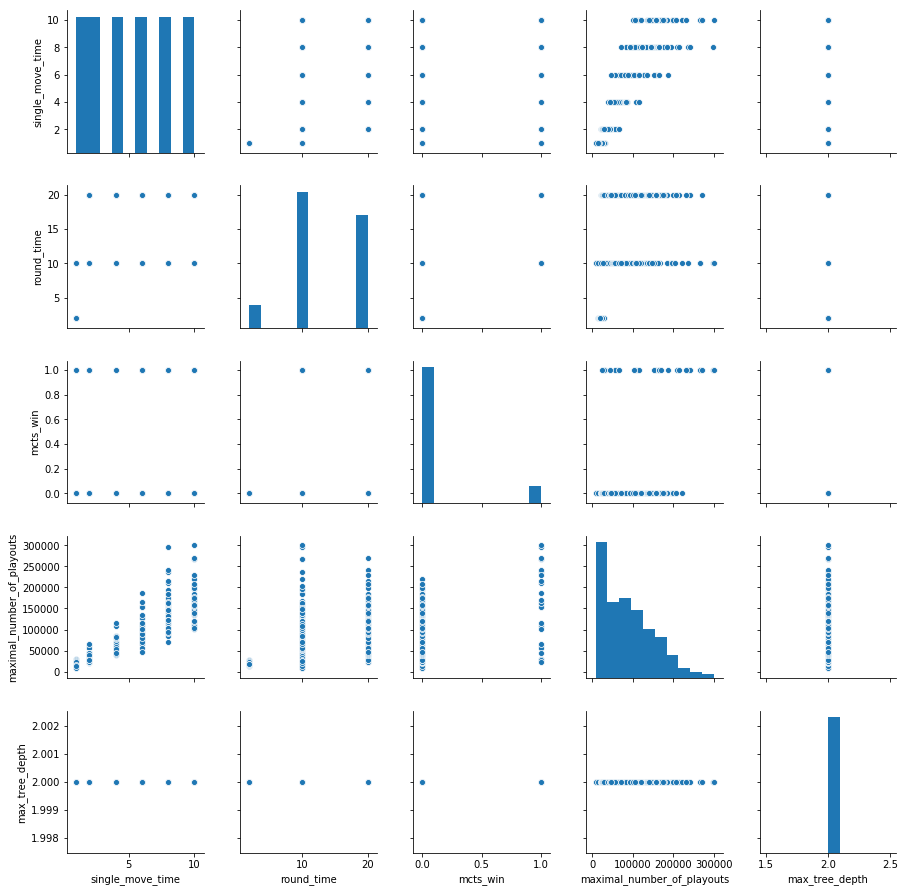

In [18]:
sns.pairplot(passive)

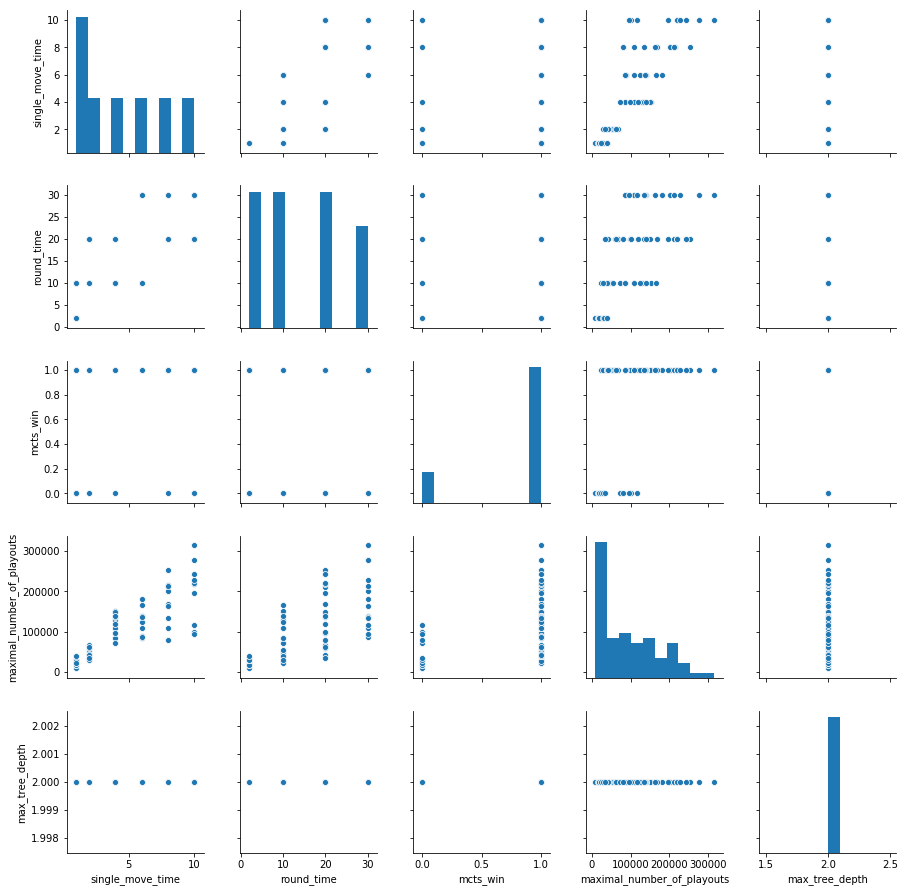

In [20]:
sns.pairplot(random)